# Tu primer random forest con scikit-learn

In [1]:
#Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima Indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:
#Cargamos dataset a utilizar
df = pd.read_csv('../Data/pima-indians-diabetes.csv')

## Exploración de datos

In [3]:
#Visualización del dataframe
df.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
388,3,100,68,23,81,31.6,0.949,28,0
563,0,91,80,0,0,32.4,0.601,27,0
567,4,154,72,29,126,31.3,0.338,37,0
538,3,129,92,49,155,36.4,0.968,32,1
48,7,105,0,0,0,0.0,0.305,24,0
731,2,174,88,37,120,44.5,0.646,24,1
762,10,101,76,48,180,32.9,0.171,63,0
640,4,128,70,0,0,34.3,0.303,24,0
18,1,115,70,30,96,34.6,0.529,32,1
574,1,119,44,47,63,35.5,0.280,25,0


In [4]:
#Renombramos las columnas
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [5]:
#Verificación de datos
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [6]:
#Analizamos el shape del objeto
df.shape

(767, 9)

In [7]:
#Visualizamos los tipos de datos
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [8]:
#Separamos en X e y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [9]:
#Importamos las librerías necesarias para la creación del modelo
from sklearn.model_selection import train_test_split
#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [10]:
#Árbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=00000)

In [11]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [12]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [14]:
#Calculo de métricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

#Imprimo los resultados
print(f'''
Train Accuracy: {train_accuracy}
 Test Accuracy: {test_accuracy}''')


Train Accuracy: 0.9850746268656716
 Test Accuracy: 0.7445887445887446


In [15]:
#Verificamos el feature importances
feature_importances = pd.DataFrame(
    {'feature': list(X.columns),
     'importance': random_forest.feature_importances_}
).sort_values('importance', ascending=False)
# Mostrar
feature_importances

,feature,importance
1,Glucose,0.205740
5,BMI,0.193899
7,Age,0.129633
6,DiabetesPedigreeFunction,0.126973
0,Pregnancies,0.096289
2,BloodPressure,0.086302
3,SkinThickness,0.081293
4,Insulin,0.079870


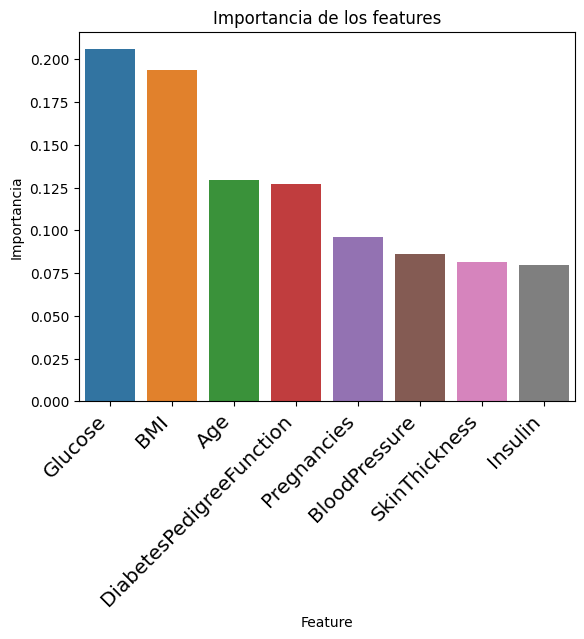

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(
    data=feature_importances,
    x='feature',
    y='importance'
)
plt.xlabel('Feature')
plt.ylabel('Importancia')
plt.title('Importancia de los features')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large');

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**